# Learn how to play with ER/NR band

Tunnell, April 2016

This tutorial describes how to draw the ER and NR bands to determine seperation.  It compared run10 AmBe to the run14 tritiated methane.

The following line just runs our standard code for every analysis.  You can change 'run' to 'load' to see what is in there.

In [1]:
%matplotlib inline
%run boiler_plate.py

# Import the XENON100 configuration from pax
from pax.configuration import load_configuration
pax_config = load_configuration('XENON100')

# Load hax - helpers for analysis
import hax  # rootpy raises a warning, but ignore

# The following paths are specific to Midway
hax.init(main_data_paths=['/project/lgrandi/xenon100/archive/root/merged/xenon100/run_14_pax4.1.2',
                          '/project/lgrandi/xenon100/archive/root/merged/xenon100/run_10_pax4.1.2'])

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## Choose datasets

Here we choose the tritiated methane and AmBe datasets:

In [3]:
# These are tritiated methane from run14
datasets_er = ['xe100_151125_1955', 'xe100_151124_1531',
              'xe100_151124_1629', 'xe100_151124_1741',
              'xe100_151124_2006', 'xe100_151124_2234',
              'xe100_151125_0104', 'xe100_151125_0337',
              'xe100_151125_0613', 'xe100_151125_0853',
              'xe100_151125_1133', 'xe100_151125_1417',
              'xe100_151125_1704', 'xe100_151125_1955',
              'xe100_151125_2249', 'xe100_151126_0147',
              'xe100_151126_0449', 'xe100_151126_0754',
              'xe100_151126_1103', 'xe100_151126_1416',
              'xe100_151126_1526', 'xe100_151126_1846',
              'xe100_151126_2208', 'xe100_151127_0136',
              'xe100_151127_0507', 'xe100_151127_0844']
print('Tritium', datasets_er)

# Query for AmBe runs
query = 'source == "AmBe" & category == "standard" & location != ""'
datasets_nr = hax.runs.datasets.query(query)['name'].values
print("AmBe", datasets_nr)

Tritium ['xe100_151125_1955', 'xe100_151124_1531', 'xe100_151124_1629', 'xe100_151124_1741', 'xe100_151124_2006', 'xe100_151124_2234', 'xe100_151125_0104', 'xe100_151125_0337', 'xe100_151125_0613', 'xe100_151125_0853', 'xe100_151125_1133', 'xe100_151125_1417', 'xe100_151125_1704', 'xe100_151125_1955', 'xe100_151125_2249', 'xe100_151126_0147', 'xe100_151126_0449', 'xe100_151126_0754', 'xe100_151126_1103', 'xe100_151126_1416', 'xe100_151126_1526', 'xe100_151126_1846', 'xe100_151126_2208', 'xe100_151127_0136', 'xe100_151127_0507', 'xe100_151127_0844']
AmBe ['xe100_120402_1116' 'xe100_120402_1415' 'xe100_120402_1727'
 'xe100_120402_2000' 'xe100_120402_2233' 'xe100_120403_0107'
 'xe100_120403_0340' 'xe100_120403_0615' 'xe100_120403_0850'
 'xe100_120403_1125' 'xe100_120403_1400' 'xe100_120403_1634'
 'xe100_120403_1910' 'xe100_120403_2145' 'xe100_120404_0020'
 'xe100_120404_0255' 'xe100_120404_0529' 'xe100_120404_0804']


## Load data

Here we genereate the minitrees (formerly: skim files) for each dataset.  After running this command, 'df' will contain all the data and there should also be ntuple ROOT files that appear in your current directory.  I create two pandas DataFrames: one per source type.

In [4]:
df_er = hax.minitrees.load([x + '_pax4.1.2' for x in datasets_er]) # Need to append pax version since old processing
df_nr = hax.minitrees.load(datasets_nr)

Found minitree at ./xe100_151125_1955_pax4.1.2_Basics.root
Found minitree at ./xe100_151124_1531_pax4.1.2_Basics.root
Found minitree at ./xe100_151124_1629_pax4.1.2_Basics.root
Found minitree at ./xe100_151124_1741_pax4.1.2_Basics.root
Found minitree at ./xe100_151124_2006_pax4.1.2_Basics.root
Found minitree at ./xe100_151124_2234_pax4.1.2_Basics.root
Found minitree at ./xe100_151125_0104_pax4.1.2_Basics.root
Found minitree at ./xe100_151125_0337_pax4.1.2_Basics.root
Found minitree at ./xe100_151125_0613_pax4.1.2_Basics.root
Found minitree at ./xe100_151125_0853_pax4.1.2_Basics.root
Found minitree at ./xe100_151125_1133_pax4.1.2_Basics.root
Found minitree at ./xe100_151125_1417_pax4.1.2_Basics.root
Found minitree at ./xe100_151125_1704_pax4.1.2_Basics.root
Found minitree at ./xe100_151125_1955_pax4.1.2_Basics.root
Found minitree at ./xe100_151125_2249_pax4.1.2_Basics.root
Found minitree at ./xe100_151126_0147_pax4.1.2_Basics.root
Found minitree at ./xe100_151126_0449_pax4.1.2_Basics.ro

Created minitree Basics for dataset xe100_120403_0340


Created minitree Basics for dataset xe100_120403_0615


Created minitree Basics for dataset xe100_120403_0850


Created minitree Basics for dataset xe100_120403_1125


Created minitree Basics for dataset xe100_120403_1400


Created minitree Basics for dataset xe100_120403_1634


Created minitree Basics for dataset xe100_120403_1910


Created minitree Basics for dataset xe100_120403_2145


Created minitree Basics for dataset xe100_120404_0020


Created minitree Basics for dataset xe100_120404_0255


Created minitree Basics for dataset xe100_120404_0529


Created minitree Basics for dataset xe100_120404_0804


And add source type to each DataFrame so we can later combine them.

In [5]:
df_er['source'] = 'Tritium'
df_nr['source'] = 'AmBe'

Combine the dataframes into one for easier analysis.

In [7]:
df = pd.concat([df_er, df_nr])

This is an old version of pax that uses positive $z$.  Therefore, we need to fix this:

In [8]:
df['z'] = -1 * df['z']

Peak at first 5 events

In [9]:
df.head()

,index,cs1,cs2,dataset_number,drift_time,event_number,event_time,largest_coincidence,largest_other_s1,largest_other_s2,largest_unknown,largest_veto,s1,s1_area_fraction_top,s2,s2_area_fraction_top,x,y,z,source
0,0,26.574498,8207.709859,1.511252e+09,111467.828125,0,-363593728,0.0,0.00000,25.146364,0.0,0.0,29.917625,0.181913,6406.849609,0.549000,-1.178571,8.498120,-19.283934,Tritium
1,1,26.717555,8535.272819,1.511252e+09,39061.460938,1,-226821888,0.0,6.62885,41.985134,0.0,0.0,20.694386,0.227523,7825.628906,0.530312,-3.783835,6.513158,-6.757633,Tritium
2,2,7.477378,1534.486105,1.511252e+09,16885.148438,2,-224619776,0.0,0.00000,0.000000,0.0,0.0,5.460357,0.779893,1477.975098,0.526108,-0.310150,-3.039474,-2.921131,Tritium
3,3,15.932814,7100.579123,1.511252e+09,42699.093750,3,-200657920,0.0,0.00000,18.607754,0.0,0.0,12.348376,0.137763,6457.804688,0.564483,10.607142,0.062030,-7.386943,Tritium
4,4,NaN,NaN,1.511252e+09,NaN,4,-140000768,0.0,0.00000,1005.057129,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tritium


## Cuts

The following functions applies cuts to the DataFrame 'df'.

In [10]:
def do_cut(df, cut, name=''):
    """Does a cut (specified as boolean array or Series) on df, modifying it in place.
    Additionally, prints out passthrough info
    """
    n_before = len(df)
    df = df[cut]
    print("%s cut: %d events removed (%0.2f%% passthrough)" % (
            name, n_before - len(df), len(df)/n_before * 100))
    return df

And grab some useful parameters for definig cuts:

In [11]:
tpc_length = pax_config['DEFAULT']['tpc_length']
tpc_radius = pax_config['DEFAULT']['tpc_radius']

Require one interaction (i.e., one S1 and S2 pair)

In [12]:
df = do_cut(df, df['cs1'] > 0, 'At least an interaction')

At least an interaction cut: 1908143 events removed (60.01% passthrough)


Let's apply a light fiducial volume cut:

In [13]:
df = do_cut(df, (-0.05 * tpc_length > df['z']) & (df['z'] > - 0.90 * tpc_length), 'z')
df = do_cut(df, (df['x']**2 + df['y']**2)**0.5 < tpc_radius * 0.90, 'radial')

z cut: 523021 events removed (81.74% passthrough)
radial cut: 369454 events removed (84.22% passthrough)


An S2 double scatter cut:

In [14]:
df = do_cut(df, df['largest_other_s2'] < 100, 'Double scatter (absolute)')
df = do_cut(df, df['largest_other_s2'] < 0.5 * df['cs2'], 'Double scatter (relative)')

Double scatter (absolute) cut: 670180 events removed (66.00% passthrough)
Double scatter (relative) cut: 7325 events removed (99.44% passthrough)


## Energy spectra

What energy spectrum remains?

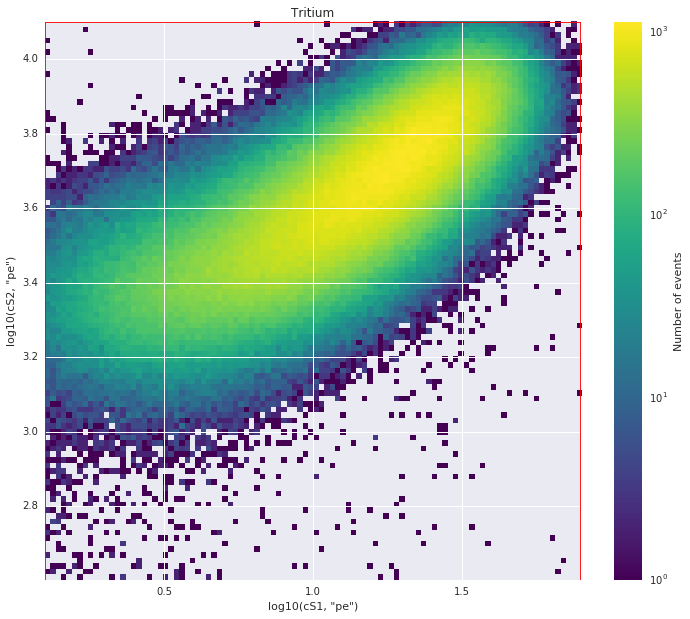

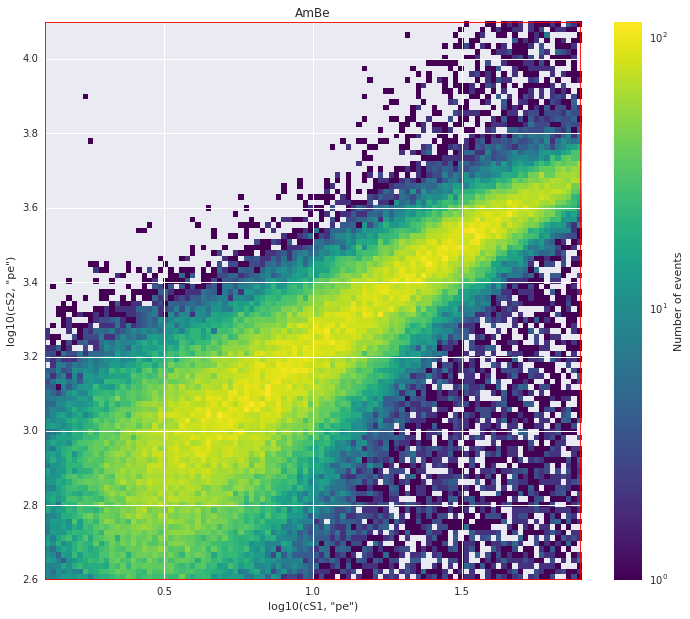

In [21]:
for source in df['source'].unique():
    plt.hist2d(np.log10(df[df['source'] == source]['cs1']), np.log10(df[df['source'] == source]['cs2']),
               bins=100, 
               norm=matplotlib.colors.LogNorm()   # Logarithmic color scale
    )
    plt.colorbar(label='Number of events')

    plt.xlabel('log10(cS1, "pe")')
    plt.ylabel('log10(cS2, "pe")')

    # By eye
    plt.axvline(0.1, color='red')
    plt.axvline(1.9, color='red')
    plt.axhline(2.6, color='red')
    plt.axhline(4.1, color='red')

    plt.title(source)
    plt.show()

Select what looks like the band

In [22]:
df = do_cut(df,    (np.log10(df['cs1']) > 0.1) & 
                   (np.log10(df['cs1']) < 1.9) &
                   (np.log10(df['cs2']) > 2.6) & 
                   (np.log10(df['cs2']) < 4.1),
            name='Energy range')

Energy range cut: 0 events removed (100.00% passthrough)


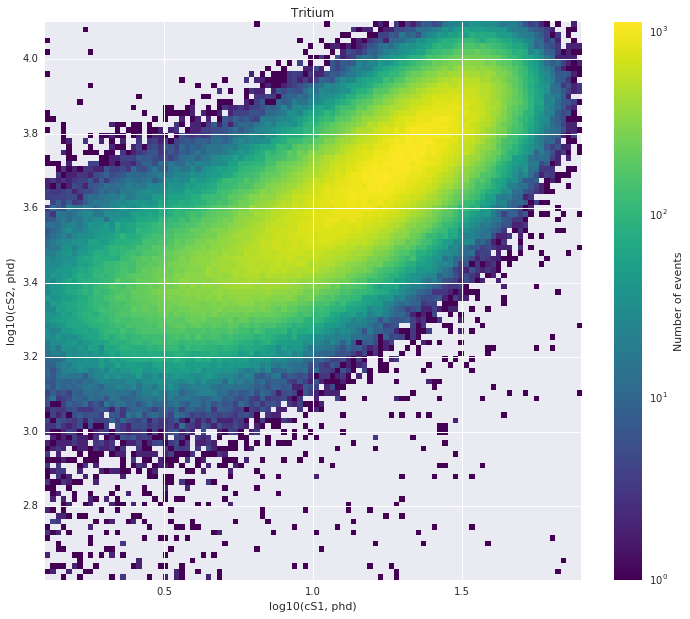

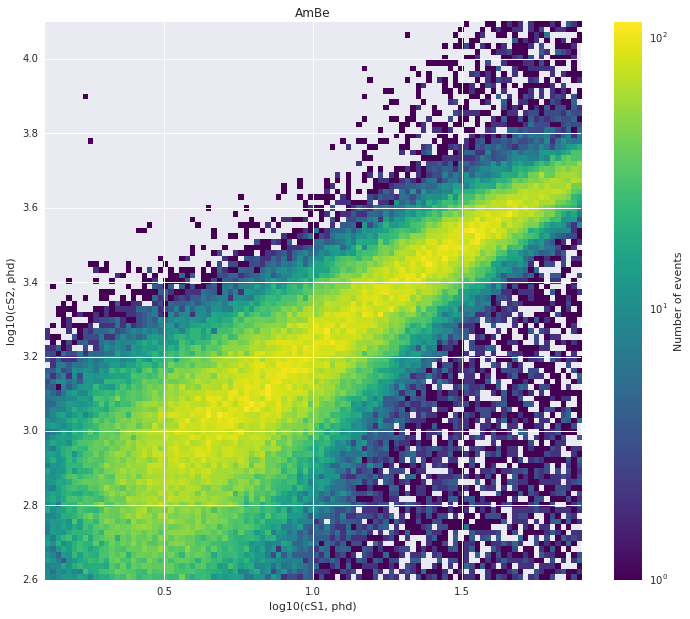

In [23]:
for source in df['source'].unique():
    # Make an S1 vs S2 histogram
    plt.hist2d(np.log10(df[df['source'] == source]['cs1']),
               np.log10(df[df['source'] == source]['cs2']),
               bins=100, 
               norm=matplotlib.colors.LogNorm()   # Logarithmic color scale
    )
    plt.colorbar(label='Number of events')

    plt.xlabel('log10(cS1, phd)')
    plt.ylabel('log10(cS2, phd)')
    plt.title(source)
    plt.show()

We can look at it more in the 'band' way:

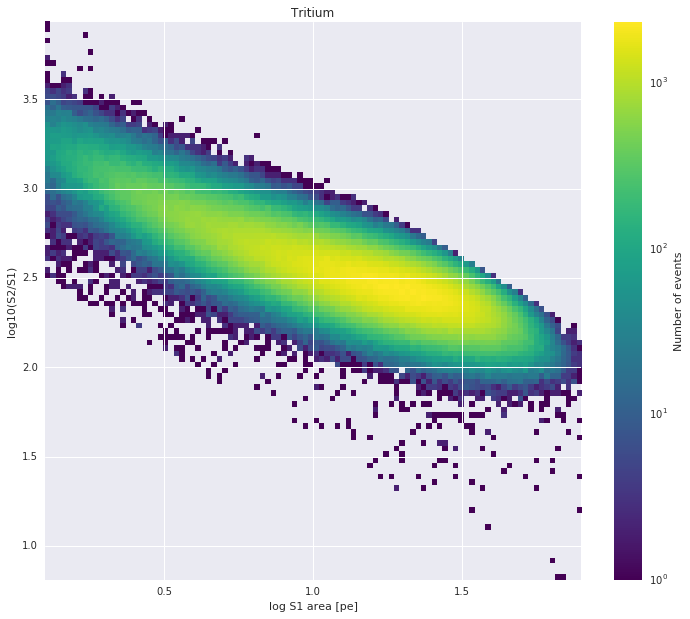

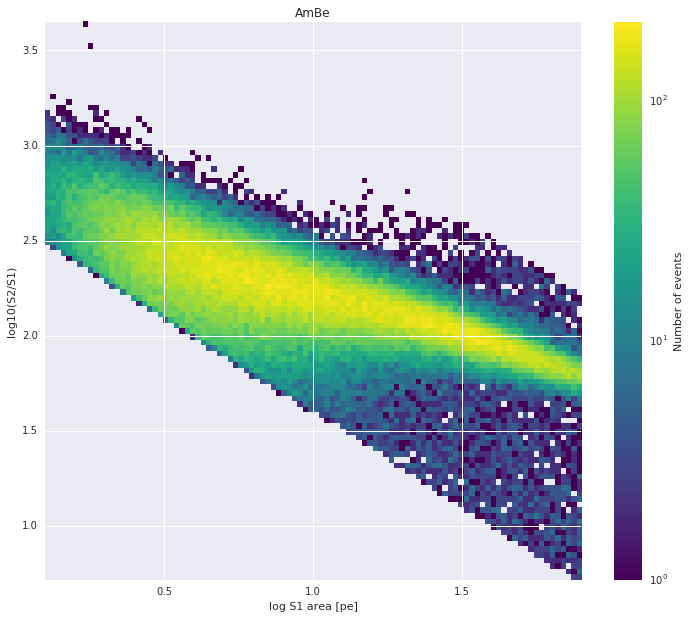

In [24]:
for source in df['source'].unique():
    # Make an S1 vs S2 histogram
    plt.hist2d(np.log10(df[df['source'] == source]['cs1']),
               np.log10(df['cs2'][df['source'] == source]/df[df['source'] == source]['cs1']),
               bins=100, 
               norm=matplotlib.colors.LogNorm()   # Logarithmic color scale
    )
    plt.colorbar(label='Number of events')

    plt.title(source)
    plt.xlabel('log S1 area [pe]')
    plt.ylabel('log10(S2/S1)')

    plt.show()

## Comments for fitting

You can always extract the values this way:

In [20]:
#df['cs1'].tolist()

## Violin plot

These plots are useful for seeing the distributions within an S1 slice.

In [25]:
bins = np.arange(0,50,10)

In [26]:
df['cs1_binned'] = (np.digitize(df['cs1'], bins) + 0.5) * (bins[1] - bins[0])

Make a violin plot so we can see how much the ER and NR overlap in certain energy bins.  Kernel density estimation is used for smoothing.

(0, 10000)

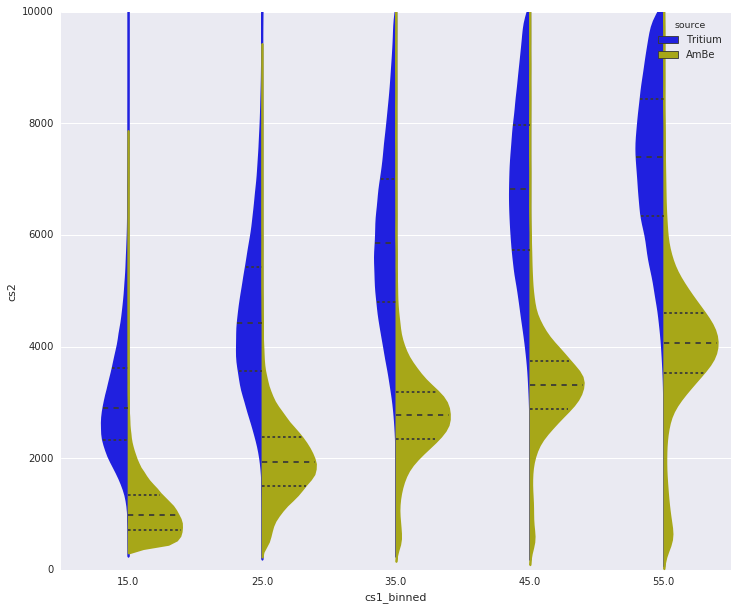

In [27]:
#sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = df[df['cs2'] < 10000]

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="cs1_binned", y="cs2", hue="source", data=tips, split=True,
               inner="quart", palette={"Tritium": "b", 'AmBe' : 'y' })
sns.despine(left=True)
plt.ylim(0,10000)
plt.title("Violin plot to see event distributions in S1 slices")
plt.ylabel('cs2 ["pe"]')
plt.xlabel('cs1 ["pe"]')

See how much the distributions overlap in 2D space.

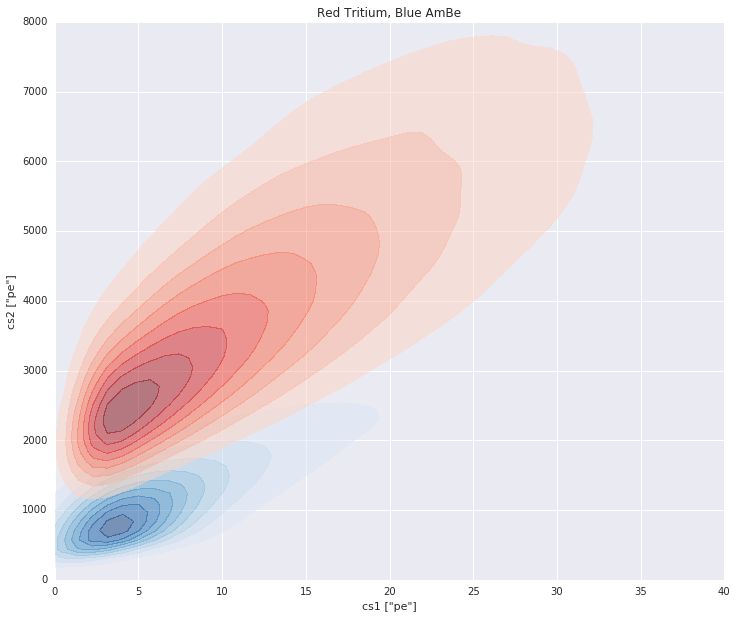

In [29]:
# Subset the iris dataset by species
df_tritium = df[df['source'] == 'Tritium']
df_ambe = df[df['source'] == 'AmBe']

# Set up the figure
f, ax = plt.subplots()
#ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(df_ambe.cs1, df_ambe.cs2, n_levels=10, shade=True, alpha=0.5,
                 cmap="Blues", shade_lowest=False)
ax = sns.kdeplot(df_tritium.cs1, df_tritium.cs2, n_levels=10,
                 cmap="Reds", shade_lowest=False, shade=True, alpha=0.5,)


plt.xlim(0,40)
plt.ylim(0,8000)
plt.title("Red Tritium, Blue AmBe")
plt.ylabel('cs2 ["pe"]')
plt.xlabel('cs1 ["pe"]')

# NR/ER separation

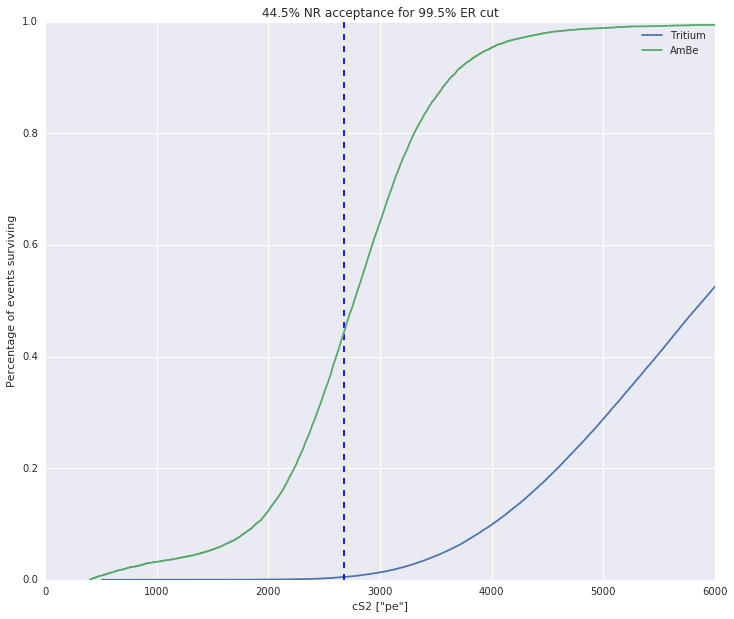

In [30]:
er_rejection = 0.5 # %
data_er = df[(df['source'] == 'Tritium') & (df['cs1_binned'] == 35)]['cs2']
sorted_data_er = np.sort(data_er).copy()
plt.step(sorted_data_er, np.linspace(0,1,sorted_data_er.size),
        label='Tritium')  
cut_value = np.percentile(sorted_data_er, er_rejection)
plt.axvline(cut_value, ls='dashed')

data_nr = df[(df['source'] == 'AmBe') & (df['cs1_binned'] == 35)]['cs2']
sorted_data_nr = np.sort(data_nr).copy()

plt.step(sorted_data_nr, np.linspace(0,1,sorted_data_nr.size),
        label='AmBe')  
acceptance = 1 - (sorted_data_nr > cut_value).sum()/sorted_data_nr.size

plt.title("%0.1f%% NR acceptance for %0.1f%% ER cut" % (acceptance*100,
                                                     100 - er_rejection))
plt.ylabel("Percentage of events surviving")
plt.xlabel('cS2 ["pe"]')
plt.xlim(0, 6000)
plt.legend()
plt.show()

Compute the NR acceptance for different combinations of rejection factor as a function of S1

In [34]:
n = 20
bins = np.arange(0,50,n)  
x = c(bins)
y = np.logspace(-3.0, -1, n)

xv, yv = np.meshgrid(x, y, sparse=False, indexing='xy')

zv = np.zeros_like(xv)

for i in range(x.size):
    for j in range(y.size):
        s1_lower = bins[i]
        s1_upper = bins[i+1]
        s1 = xv[j,i]
        er_rejection = yv[j,i] * 100 # in %

        df_element = df[(df['cs1'] > s1_lower) & (df['cs1'] < s1_upper)]

        
        data_er = df_element[df_element['source'] == 'Tritium']['cs2']
        sorted_data_er = np.sort(data_er).copy()
        cut_value = np.percentile(sorted_data_er, er_rejection)
        
        data_nr = df_element[df_element['source'] == 'AmBe']['cs2']
        sorted_data_nr = np.sort(data_nr).copy()
        acceptance = 1 - (sorted_data_nr > cut_value).sum()/sorted_data_nr.size        
        
        zv[j,i] = acceptance# treat xv[j,i], yv[j,i]

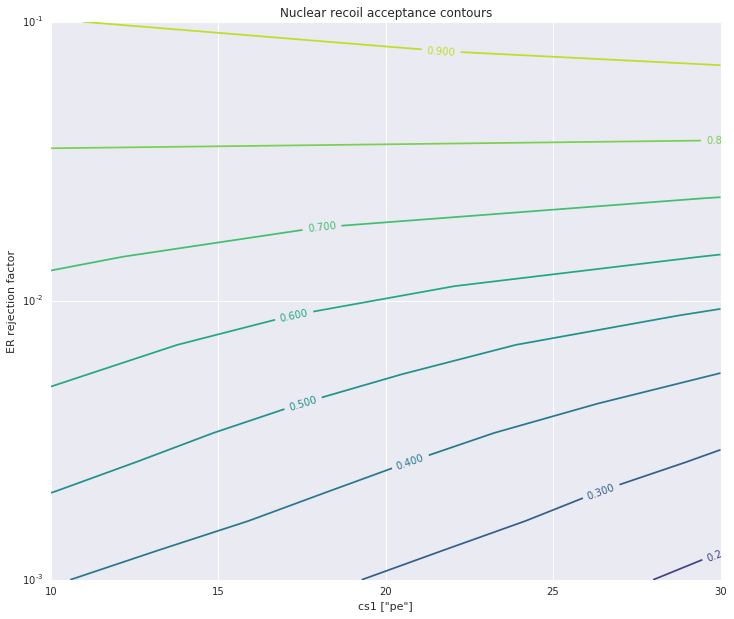

In [35]:
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

plt.figure()
plt.yscale('log')
CS = plt.contour(xv, yv, zv, levels=np.linspace(0,1.0,11))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('cs1 ["pe"]')
plt.ylabel('ER rejection factor')
plt.title("Nuclear recoil acceptance contours")